### Q1. Which two operator overloading methods can you use in your classes to support iteration?

Iterator in python is an object that is used to iterate over iterable objects like lists, tuples, dicts, and sets. The iterator object is initialized using the iter() method. It uses the next() method for iteration.
 

__iter(iterable)__ method that is called for the initialization of an iterator. This returns an iterator object

next ( __next__ in Python 3) The next method returns the next value for the iterable. When we use a for loop to traverse any iterable object, internally it uses the iter() method to get an iterator object which further uses next() method to iterate over. This method raises a StopIteration to signal the end of the iteration.

How an iterator really works in python

In [2]:
# Here is an example of a python inbuilt iterator
# value can be anything which can be iterate
iterable_value = 'Geeks'
iterable_obj = iter(iterable_value)

while True:
	try:

		# Iterate by calling next
		item = next(iterable_obj)
		print(item)
	except StopIteration:

		# exception will happen when iteration will over
		break


G
e
e
k
s


Below is a simple Python custom iterator that creates iterator type that iterates from 10 to a given limit. For example, if the limit is 15, then it prints 10 11 12 13 14 15. And if the limit is 5, then it prints nothing

In [3]:
# A simple Python program to demonstrate
# working of iterators using an example type
# that iterates from 10 to given value

# An iterable user defined type
class Test:

	# Constructor
	def __init__(self, limit):
		self.limit = limit

	# Creates iterator object
	# Called when iteration is initialized
	def __iter__(self):
		self.x = 10
		return self

	# To move to next element. In Python 3,
	# we should replace next with __next__
	def __next__(self):

		# Store current value ofx
		x = self.x

		# Stop iteration if limit is reached
		if x > self.limit:
			raise StopIteration

		# Else increment and return old value
		self.x = x + 1;
		return x

# Prints numbers from 10 to 15
for i in Test(15):
	print(i)

# Prints nothing
for i in Test(5):
	print(i)


10
11
12
13
14
15


### Q2. In what contexts do the two operator overloading methods manage printing?


You’ll find various python operators and their magic methods in the table below.
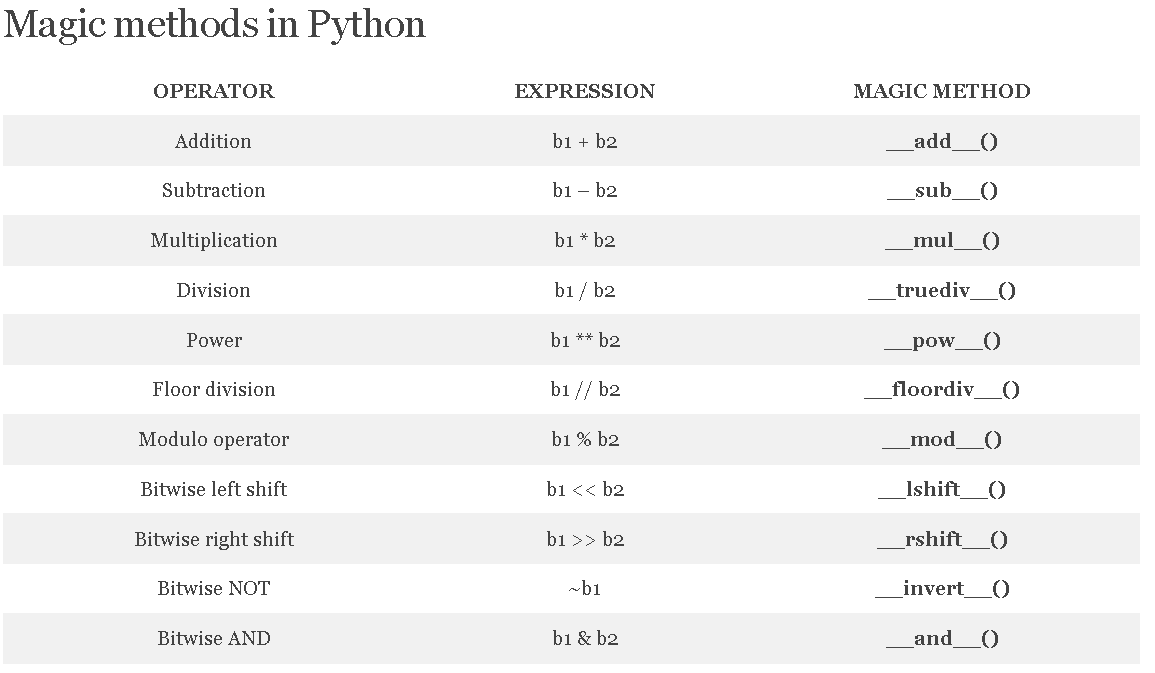
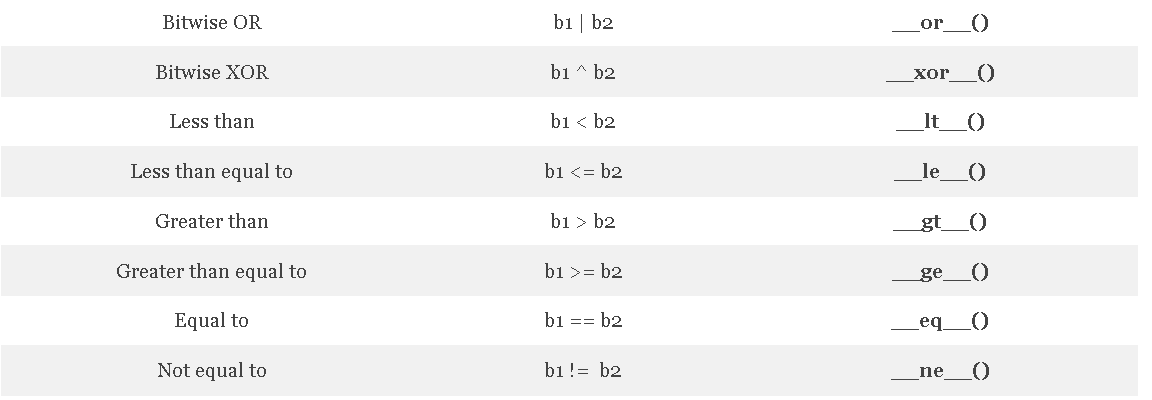

### Q3. In a class, how do you intercept slice operations?


In [ ]:
class InterceptedList(list):
    def addSave(func):
        def newfunc(self, *args):
            func(self, *args)
            print ('saving')
        return newfunc

__setslice__ = addSave(list.__setslice__)
__delslice__ = addSave(list.__delslice__)
    
    
l = InterceptedList()
l.extend([1,2,3,4])


l[3:] = [5] # note: 'saving' is not printed

Python slice() function returns a slice object. 

A sequence of objects of any type(string, bytes, tuple, list or range) or the object which implements __getitem__() and __len__() method then this object can be sliced using slice() method.

Syntax: 

* slice(stop)
* slice(start, stop, step)

Parameters: 
* start: Starting index where the slicing of object starts.
* stop: Ending index where the slicing of object stops.
* step: It is an optional argument that determines the increment between each index for slicing.
Return Type: Returns a sliced object containing elements in the given range only. 


Note: If only one parameter is passed then start and step is considered to be None. 

In [11]:
#Example 1: Python slice string
# Python program to demonstrate
# slice() operator

# String slicing
String = 'iNeuron.ai'
s1 = slice(3)
s2 = slice(1, 5, 2)

print("String slicing")
print(String[s1])
print(String[s2])


String slicing
iNe
Nu


### Q4. In a class, how do you capture in-place addition?



Python in its definition provides methods to perform inplace operations, i.e doing assignment and computation in a single statement using “operator” module. For example,

x += y is equivalent to x = operator.iadd(x, y) 

Some Important Inplace operations :
    
1. iadd() :- This function is used to assign and add the current value. This operation does “a+=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

2. iconcat() :- This function is used to concat one string at end of second.

3. isub() :- This function is used to assign and subtract the current value. This operation does “a-=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

4. imul() :- This function is used to assign and multiply the current value. This operation does “a*=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

5. itruediv() :- This function is used to assign and divide the current value. This operation does “a/=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

6. imod() :- This function is used to assign and return remainder . This operation does “a%=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

### Q5. When is it appropriate to use operator overloading?

Operator overloading is mostly useful when you're making a new class that falls into an existing "Abstract Base Class" (ABC) -- indeed, many of the ABCs in standard library module collections rely on the presence of certain special methods (and special methods, one with names starting and ending with double underscores AKA "dunders", are exactly the way you perform operator overloading in Python). This provides good starting guidance.

For example, a Container class must override special method __contains__, i.e., the membership check operator item in container (as in, if item in container: -- don't confuse with the for statement, for item in container:, which relies on __iter__!-). Similarly, a Hashable must override __hash__, a Sized must override __len__, a Sequence or a Mapping must override __getitem__, and so forth. (Moreover, the ABCs can provide your class with mixin functionality -- e.g., both Sequence and Mapping can provide __contains__ on the basis of your supplied __getitem__ override, and thereby automatically make your class a Container).